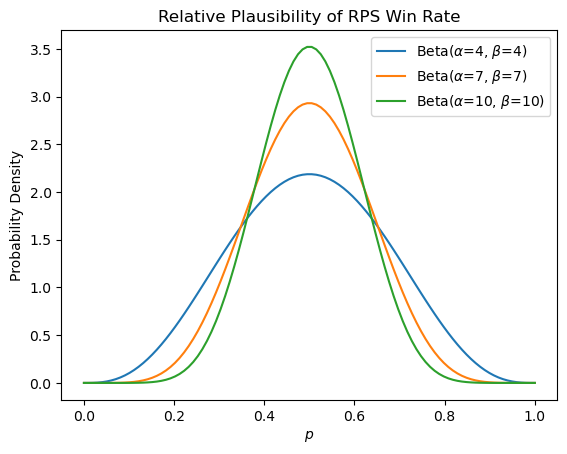

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, bernoulli

parameters = [
    (4, 4),
    (7, 7),
    (10, 10)
]

x = np.linspace(0, 1, 100)
plt.figure()

for i, (alpha, beta_val) in enumerate(parameters):
    y = beta.pdf(x, alpha, beta_val)
    label = f'Beta($\\alpha$={alpha}, $\\beta$={beta_val})'
    plt.plot(x, y, label=label)

plt.xlabel("$p$")
plt.ylabel("Probability Density")
plt.title('Relative Plausibility of RPS Win Rate')
plt.legend()
# plt.grid(True)

In [60]:
 beta.pdf(0.5, 10, 10) / beta.pdf(0.7, 10, 10)

4.802710683776413

In [61]:
np.random.seed(42)
n = 10
p = beta.rvs(10, 10)
y = bernoulli.rvs(p, size=n)

print(f'p = {p}') 
print(f'y = {y}')

p = 0.5499465562958551
y = [1 1 1 0 0 0 1 0 0 1]


In [69]:
def simulate_model_outcome(alpha_param, beta_param, n):
    p = beta.rvs(alpha_param, beta_param)
    y = bernoulli.rvs(p, size=n)
    return y


(array([  7.,  22.,  62., 154., 173., 197., 168., 123.,  64.,  23.,   7.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

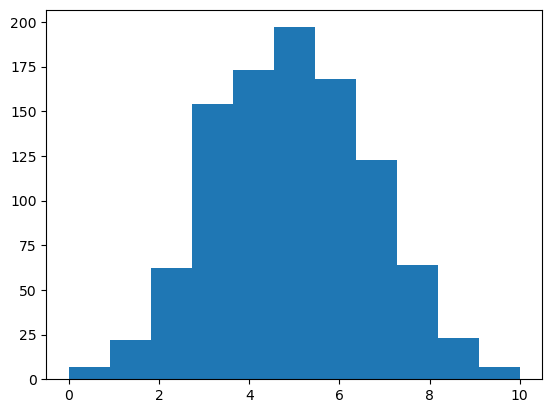

In [70]:
simulated_outcomes = np.array([
    simulate_model_outcome(alpha_param=10, beta_param=10, n=10) 
    for _ in range(1000)
])

plt.hist(simulated_outcomes.sum(axis=1), bins=11)

(array([175.,  93.,  59.,  68.,  70.,  58.,  57.,  63.,  68.,  92., 197.]),
 array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
         4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
         9.09090909, 10.        ]),
 <BarContainer object of 11 artists>)

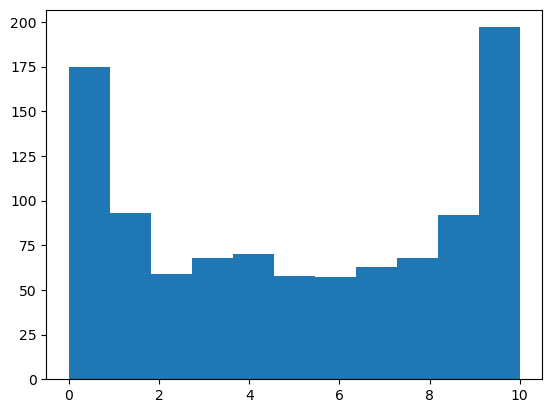

In [71]:
simulated_outcomes = np.array([
    simulate_model_outcome(alpha_param=0.5, beta_param=0.5, n=10) 
    for _ in range(1000)
])

plt.hist(simulated_outcomes.sum(axis=1), bins=11)

In [72]:
outcomes = [1, 1, 0, 1, 0, 0, 1, 1, 1, 1]

In [75]:
import pymc as pm 

rps_model = pm.Model() 

with rps_model:
    p = pm.Beta('p', alpha=10, beta=10)
    pm.Bernoulli('y', p=p, observed=outcomes)

In [76]:
with rps_model:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

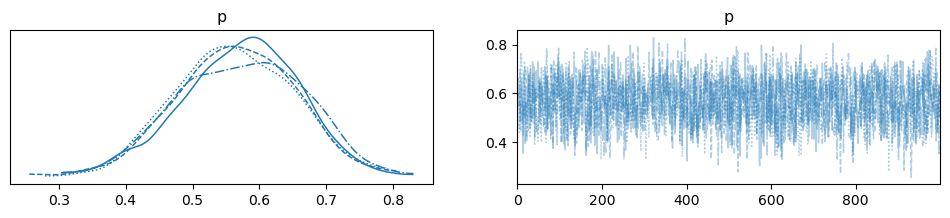

In [78]:
import arviz as az

az.plot_trace(idata)